In [ ]:
# https://sample-files.com/audio/wav/
# These samples are perfect for audio engineers, developers, and anyone working with high-fidelity sound.

<p style="font-family:consolas; font-size: 28px; color: magenta">PyTorch for Speech Recognition</p>

In [ ]:
'''
 Speech recognition is a transformative technology that enables computers to understand and interpret spoken language, 
 fostering seamless interaction between humans and machines
'''

'\n CIFAR-10 Dataset as it suggests has 10 different categories of images in it. \n There is a total of 60000 images of 10 different classes \n naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32x32. \n There are in total 50000 train images and 10000 test images.\n'

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Loading Audio Data:</p>

In [1]:
'''
The audio file can be in various formats like WAV, MP3, or FLAC. 
Libraries like torchaudio in Python provide functions to load audio files efficiently
'''
import torchaudio

# Load audio file
waveform, sample_rate = torchaudio.load('../data/voice-sample.wav')

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Resampling (Optional):</p>

In [3]:
'''
Audio data may have different sampling rates, which represent the number of samples per second.
Some models may require a specific sampling rate for processing.
'''
target_sr = 16000
resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
waveform = resampler(waveform)

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Preprocessing:</p>

In [ ]:
'''
Preprocessing techniques may include normalization, feature extraction, 
or augmentation, depending on the specific task and requirements.
'''

In [4]:
'''
Common preprocessing steps for speech recognition tasks include removing silence, applying noise reduction techniques, 
and extracting features like Mel-frequency cepstral coefficients (MFCCs) or spectrograms
'''
mfcc_transform = torchaudio.transforms.MFCC(sample_rate=16000)
mfcc = mfcc_transform(waveform)

c:\Users\38067\anaconda3\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Loading and Preprocessing Audio Data with librosa (alternative): </p>

In [ ]:
'''
librosa.load function is used to load an audio file ('audio_file.wav') into memory, returning the audio waveform 
as a one-dimensional NumPy array (waveform) and the sample rate of the audio (sample_rate).
'''

In [7]:
'''
import librosa

# Load audio file
waveform, sample_rate = librosa.load('../data/voice-sample.wav', sr=None)

 
# Resampling (if needed)
waveform = librosa.resample(waveform, orig_sr=sample_rate, target_sr=sample_rate)

# Feature Extraction (e.g., MFCCs)
mfcc = librosa.feature.mfcc(waveform, sr=sample_rate)
'''

"\nimport librosa\n\n# Load audio file\nwaveform, sample_rate = librosa.load('../data/voice-sample.wav', sr=None)\n\n \n# Resampling (if needed)\nwaveform = librosa.resample(waveform, orig_sr=sample_rate, target_sr=sample_rate)\n\n# Feature Extraction (e.g., MFCCs)\nmfcc = librosa.feature.mfcc(waveform, sr=sample_rate)\n"

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Using Wav2Vec2 Model for Speech Recognition</p>

In [ ]:
'''
Wav2Vec2 model is a deep learning architecture designed for speech processing tasks, 
particularly for automatic speech recognition (ASR)
'''
'''
It is an extension of the original Wav2Vec model and utilizes a self-supervised pre-training approach 
to learn speech representations directly from raw audio waveforms.
'''

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


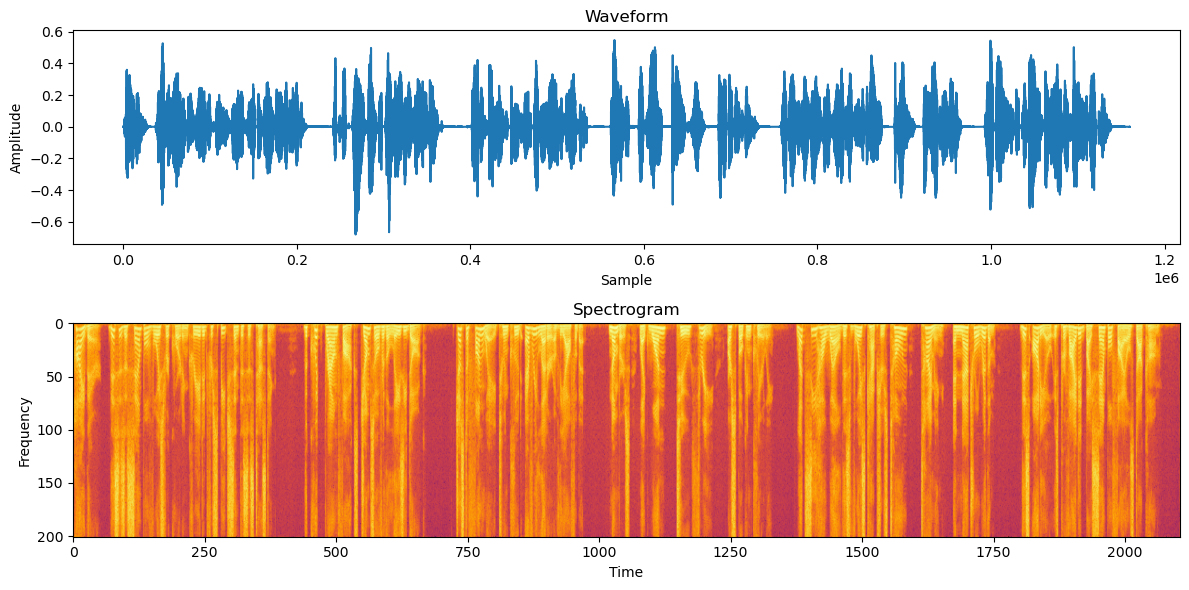

Transcription: ["HIGH THERE THIS IS A SAMPLE VOICE RECORDING CREATED FOR SPEECH SYNTHESIS TESTING THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG JUST A FUN WAY TO INCLUDE EVERY LETTER OF THE ALPHABET NUMBERS LIKE ONE TWO THREE ARE SPOKEN CLEARLY LET'S SEE HOW WELL THIS VOICE CAPTURES TONE TIMING AND NATURAL RHYTHM THIS AUDIO IS PROVIDED BY SAMPLE FILES DAK KOM"]


In [9]:
import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import matplotlib.pyplot as plt

# Load pre-trained model
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

# Load audio data
waveform, sample_rate = torchaudio.load("../data/voice-sample.wav")
waveform_resampled = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)

# Plot waveform and spectrogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(waveform.t().numpy())
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
spectrogram = torchaudio.transforms.Spectrogram()(waveform_resampled)
# Extract the first channel of the spectrogram for visualization
spectrogram_channel1 = spectrogram[0, :, :]
plt.imshow(spectrogram_channel1.log2().numpy(), aspect='auto', cmap='inferno')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Perform inference
with torch.no_grad():
    logits = model(waveform_resampled).logits

# Decode logits to text
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

# Print transcription
print("Transcription:", transcription)

In [ ]:
'''
 The transcribed text represents the spoken words in the audio file. 
 It is the result of passing the audio waveform through the Wav2Vec2 model and decoding the output logits into text
'''